# Koordinaten-Transformation

In [1]:
from matplotlib import pyplot as plt
from numpy.linalg import inv
import numpy as np
import math
import cv2
import random

PI = 3.1415926535

def plot4x4Mat(m):
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[0,0],m[0,1],m[0,2],m[0,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[1,0],m[1,1],m[1,2],m[1,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[2,0],m[2,1],m[2,2],m[2,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[3,0],m[3,1],m[3,2],m[3,3]))

Szenario: Der Arbeitsbereich eines Manipulators wird von einer Kamera aufgenommen. Der Arbeitsbereich ist durch einen eigenes Koordinatenssystem $W$ definiert. Aus den Bilddaten müssen die Koordinaten von Werkstücken bzgl. $W$ berechnet werden. Für die Bilddaten ist ebenfalls ein eigenes Koordinatensystem  $B$ definiert. Es gilt eine homogene Transformationsmatrix für die Berechnung der $W$ Koordinaten bei gegebenen "Pixel"-Koordinaten herzuleiten.

Die Berechnung soll folgendermassen stattfinden:
$$
    ^{W}p = ~~~^{W}_ {B}T ~~~\cdot~~~ ^{B}p
$$
$^{B}p$ und $^{W}p$ sind die Punkte in Koordinatensystem $B$ bzw. $W$. Die Matrix $^{W}_{B}T$ ist eine homogene Transformationsmatrix der Dimension 4x4, welche die Pixel-Koordinaten in entsprechende Koordinaten des Arbeitsbereich umrechnet.

### Erzeuge Bild

In [2]:
height =200
width = 200
border = 10

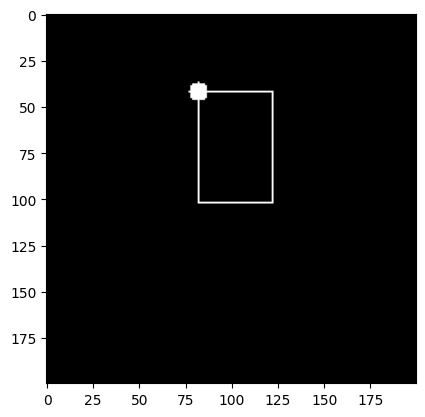

In [3]:
imgZ = np.zeros((height,width),np.uint8)
p1y = random.randrange(border,np.uint32(width/2))
p1x = random.randrange(border,np.uint32(height/2))

pxOrig= p1x
pyOrig= p1y
pxExt=pxOrig + 60 
pyExt=pyOrig + 40

cv2.rectangle(imgZ,(pyOrig,pxOrig),(pyExt,pxExt),255,1)
cv2.circle(imgZ,(pyOrig,pxOrig),5,255,-1)
plt.imshow(imgZ,cmap="gray")

In [4]:
pxOrig

42

In [5]:
pyOrig

82

### Transformiere Bild

#### Erzeuge Transformationsmatrix Geometrische Transformation: Rotationsmatrix mit Rotationsachse Z

In [6]:
phi_z = 0
pixelX = pxOrig
pixelY = pyOrig

In [7]:
T_B_Z_RotZ = np.array([[math.cos(phi_z),math.sin(phi_z),0,0],[-math.sin(phi_z),math.cos(phi_z),0,0],[0,0,1,0],[0,0,0,1]])

In [8]:
V_Z =  np.array([pixelX,pixelY,0,1])

In [9]:
V_Z

array([42, 82,  0,  1])

In [10]:
T_B_Z = T_B_Z_RotZ
T_B_Z[0,3] = V_Z[0]
T_B_Z[1,3] = V_Z[1]
T_B_Z[2,3] = V_Z[2]

In [11]:
plot4x4Mat(T_B_Z)

[  1.00	  0.00	  0.00	 42.00]
[ -0.00	  1.00	  0.00	 82.00]
[  0.00	  0.00	  1.00	  0.00]
[  0.00	  0.00	  0.00	  1.00]


In [12]:
T_Z_B = inv(T_B_Z)

In [13]:
plot4x4Mat(T_Z_B)

[  1.00	  0.00	  0.00	-42.00]
[  0.00	  1.00	  0.00	-82.00]
[  0.00	  0.00	  1.00	  0.00]
[  0.00	  0.00	  0.00	  1.00]


#### Wende HTm auf Pixel in Bild B an

In [14]:
imgB = np.zeros((height,width),np.uint8)
P_Z =  np.array([0,0,0,1]) 

In [15]:
for xB in range(height):
    for yB in range(width):
        value = imgZ[yB,xB]
        
        P_Z[0] = xB
        P_Z[1] = yB
        P_B = T_Z_B @ P_Z

        if( (min(P_B[0], P_B[1]) >= 0.0) and (P_B[0] < height) and (P_B[1] < width) ):
            iZ = np.uint32(P_B[0])
            jZ = np.uint32(P_B[1])
            imgB[iZ,jZ] = value
            

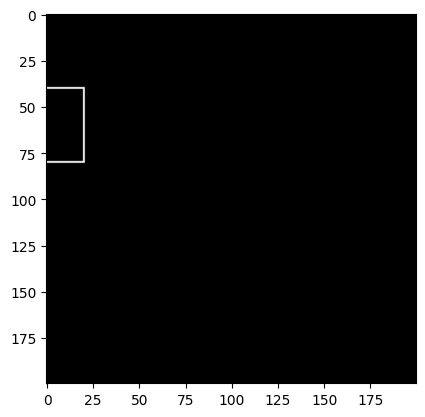

In [16]:
plt.imshow(imgB,cmap="gray")

In [17]:
max(P_B[0], P_B[1])

np.float64(157.0)

In [18]:
min(P_B[0], P_B[1])

np.float64(117.0)

In [19]:
value

np.uint8(0)